In [ ]:
!pip install webapp2

In [ ]:
!pip install --upgrade google-cloud-storage

In [1]:
import urllib.request
from google.cloud import storage

In [2]:
def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"


    filedata = urllib.request.urlopen(source_file_name)
    datatoupload = filedata.read()

    storage_client = storage.Client.from_service_account_json("/content/tidy-hold-347419-a2986510f0a4.json")
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    #blob.upload_from_filename(source_file_name)
    blob.upload_from_string(datatoupload)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )


In [3]:
g4mic_bkt = "drexel_dsci_2022_g4mic"

In [4]:
from bs4 import BeautifulSoup
import requests

def listFD(url, ext=''):
    page = requests.get(url).text
    #print (page)
    soup = BeautifulSoup(page, 'html.parser')
    return [url + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]


ext = 'zip'
Burl = 'http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Benign/'

BFiles = []
for file in listFD(Burl, ext):
    BFiles.append(file)


Murl = 'http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/'
MFiles = []
for file in listFD(Murl, ext):
    MFiles.append(file)


In [5]:
for dfile in MFiles:
  des = 'Malicious/zip/'+ dfile.split('/')[-1]
  upload_blob("drexel_dsci_2022_g4mic",dfile,des)
  print(des)

File http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/f2.zip uploaded to Malicious/zip/f2.zip.
Malicious/zip/f2.zip
File http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/f3.zip uploaded to Malicious/zip/f3.zip.
Malicious/zip/f3.zip
File http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/f4.zip uploaded to Malicious/zip/f4.zip.
Malicious/zip/f4.zip
File http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/f5.zip uploaded to Malicious/zip/f5.zip.
Malicious/zip/f5.zip
File http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/f6.zip uploaded to Malicious/zip/f6.zip.
Malicious/zip/f6.zip
File http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/f7.zip uploaded to Malicious/zip/f7.zip.
Malicious/zip/f7.zip
File http://205.174.165.80/CICDataset/CICEvasivePDFMal2022/Dataset/PDFs/Malicious/f8.zip uploaded to Malicious/zip/f8.zip.
Malicious/zip

In [ ]:
for dfile in BFiles:
  des = 'Benign/zip/'+ dfile.split('/')[-1]
  upload_blob("drexel_dsci_2022_g4mic",dfile,des)

In [ ]:
from zipfile import ZipFile
from zipfile import is_zipfile
import io

def zipextract(bucketname, zipfilename_with_path, des_path):

    storage_client = storage.Client.from_service_account_json("/content/tidy-hold-347419-a2986510f0a4.json")
    bucket = storage_client.get_bucket(bucketname)

    destination_blob_pathname = zipfilename_with_path
    
    blob = bucket.blob(destination_blob_pathname)
    zipbytes = io.BytesIO(blob.download_as_string())

    if is_zipfile(zipbytes):
        with ZipFile(zipbytes, 'r') as myzip:
            for contentfilename in myzip.namelist():
                contentfile = myzip.read(contentfilename)
                blob = bucket.blob(des_path + "/" + contentfilename)
                blob.upload_from_string(contentfile)


In [12]:
from zipfile import ZipFile
from zipfile import is_zipfile
import io

storage_client = storage.Client.from_service_account_json("/content/tidy-hold-347419-a2986510f0a4.json")
bucket = storage_client.get_bucket("drexel_dsci_2022_g4mic")

def zipextract(bucket, zipfilename_with_path, des_path):

    destination_blob_pathname = zipfilename_with_path
    
    blob = bucket.blob(destination_blob_pathname)
    zipbytes = io.BytesIO(blob.download_as_string())

    if is_zipfile(zipbytes):
        with ZipFile(zipbytes, 'r') as myzip:
            for contentfilename in myzip.namelist():
                contentfile = myzip.read(contentfilename)
                blob = bucket.blob(des_path + "/" + contentfilename)
                blob.upload_from_string(contentfile)

for blob in bucket.list_blobs(prefix='Malicious/zip/'):
    zipextract(bucket, blob.name, "Malicious/unzipped")
    print(blob.name)
    

Malicious/zip/f1.zip
Malicious/zip/f10.zip
Malicious/zip/f11.zip
Malicious/zip/f12.zip
Malicious/zip/f13.zip
Malicious/zip/f14.zip
Malicious/zip/f15.zip
Malicious/zip/f16.zip
Malicious/zip/f17.zip
Malicious/zip/f18.zip
Malicious/zip/f19.zip
Malicious/zip/f2.zip
Malicious/zip/f20.zip
Malicious/zip/f21.zip
Malicious/zip/f22.zip
Malicious/zip/f3.zip
Malicious/zip/f4.zip
Malicious/zip/f5.zip
Malicious/zip/f6.zip
Malicious/zip/f7.zip
Malicious/zip/f8.zip
Malicious/zip/f9.zip


In [ ]:
for blob in bucket.list_blobs(prefix='Benign/zip/'):
    zipextract(bucket, blob.name, "Benign/unzipped")
    print(blob.name)

In [19]:
import base64

#with open("book.pdf", "rb") as pdf_file:
#    encoded_string = base64.b64encode(pdf_file.read())

def convertToBinary(bucketname, filename_with_path, des_path):

    storage_client = storage.Client.from_service_account_json("/content/tidy-hold-347419-a2986510f0a4.json")
    bucket = storage_client.get_bucket(bucketname)

    destination_blob_pathname = filename_with_path
    
    blob = bucket.blob(destination_blob_pathname)
    zipbytes = blob.download_as_bytes()

    encoded_string = base64.b64encode(zipbytes)

    blob = bucket.blob(des_path)
    blob.upload_from_string(encoded_string)

    print("Downloaded:" , zipbytes)
    print("Transformed:", encoded_string)


In [20]:
convertToBinary(g4mic_bkt,"Benign/unzipped/02frrltr.pdf","Benign/Binary/02frrltr.bin")

Downloaded: b'%PDF-1.6\r%\xe2\xe3\xcf\xd3\r\n155 0 obj\r<</Outlines 219 0 R/Metadata 152 0 R/Pages 148 0 R/Type/Catalog/PageLabels 146 0 R>>\rendobj\r219 0 obj\r<</First 220 0 R/Count 1/Last 220 0 R/Type/Outlines>>\rendobj\r152 0 obj\r<</Subtype/XML/Length 3649/Type/Metadata>>stream\r\n<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 4.0-c321 44.398116, Tue Aug 04 2009 14:24:39">\n   <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n      <rdf:Description rdf:about=""\n            xmlns:pdf="http://ns.adobe.com/pdf/1.3/">\n         <pdf:Producer>Acrobat Distiller 6.0.1 (Windows)</pdf:Producer>\n      </rdf:Description>\n      <rdf:Description rdf:about=""\n            xmlns:xap="http://ns.adobe.com/xap/1.0/">\n         <xap:CreatorTool>PageMaker 6.5</xap:CreatorTool>\n         <xap:ModifyDate>2010-03-22T11:13:25-04:00</xap:ModifyDate>\n         <xap:CreateDate>2006-04-05T09:30:37-04:00</xap:Crea

In [18]:
import numpy as np
from PIL import Image

def convertToImage(bucketname, filename_with_path, des_path):


  storage_client = storage.Client.from_service_account_json("/content/tidy-hold-347419-a2986510f0a4.json")
  bucket = storage_client.get_bucket(bucketname)
  destination_blob_pathname = filename_with_path
  blob = bucket.blob(destination_blob_pathname)
  zipbytes = io.BytesIO(blob.download_as_string())

  #with open(zipbytes, "rb") as pdf_file:
 # # Read file using numpy "fromfile()"

  # Define width and height
  w, h = 50, 100


  #with open('data.bin', mode='rb') as f:
  d = np.fromfile(zipbytes,dtype=np.uint8,count=w*h).reshape(h,w)

  # Make into PIL Image and save
  PILimage = Image.fromarray(d)
  blob = bucket.blob(des_path)
  blob.upload_from_string(PILimage, content_type='image/jpeg')
  #blob.upload_from_file(PILimage)
  #PILimage.save('Benign/Images/02eounrel.png')


In [ ]:
import numpy as np
from PIL import Image

def convertToImage(bucketname, filename_with_path, des_path):


  storage_client = storage.Client.from_service_account_json("/content/tidy-hold-347419-a2986510f0a4.json")
  bucket = storage_client.get_bucket(bucketname)
  destination_blob_pathname = filename_with_path
  blob = bucket.blob(destination_blob_pathname)
  zipbytes = blob.download_as_text()

  print(zipbytes)
  #with open(zipbytes, "rb") as pdf_file:
 # # Read file using numpy "fromfile()"

  # Define width and height
  w, h = 80, 160


  #with open('data.bin', mode='rb') as f:
  d = np.fromstring(zipbytes,dtype=np.uint8,count=w*h).reshape(h,w)

  print("d: ",d)

  # Make into PIL Image and save
  PILimage = Image.fromarray(d)
  display(PILimage)
  blob = bucket.blob(des_path)
  blob.upload_from_string(PILimage, content_type='image/jpeg')
  #blob.upload_from_file(body =PILimage)
  #PILimage.save('Benign/Images/02eounrel.png')

JVBERi0xLjQNJeLjz9MNCjE2MyAwIG9iaiA8PC9MaW5lYXJpemVkIDEvTCAzOTY5MzYvTyAxNjYvRSA3NjAxMC9OIDM0L1QgMzkzNjI4L0ggWyA3NzYgNzU5XT4+DWVuZG9iag0gICAgICAgICAgICAgDQp4cmVmDQoxNjMgMjQNCjAwMDAwMDAwMTYgMDAwMDAgbg0KMDAwMDAwMTUzNSAwMDAwMCBuDQowMDAwMDAwNzc2IDAwMDAwIG4NCjAwMDAwMDE2MTkgMDAwMDAgbg0KMDAwMDAwMTgwOSAwMDAwMCBuDQowMDAwMDAxOTMyIDAwMDAwIG4NCjAwMDAwMDIzODkgMDAwMDAgbg0KMDAwMDAwMjk1MCAwMDAwMCBuDQowMDAwMDAzNDAxIDAwMDAwIG4NCjAwMDAwMDM1ODcgMDAwMDAgbg0KMDAwMDAwMzc3MyAwMDAwMCBuDQowMDAwMDAzODk4IDAwMDAwIG4NCjAwMDAwMDQwMjEgMDAwMDAgbg0KMDAwMDAwNDIxNiAwMDAwMCBuDQowMDAwMDA0ODU5IDAwMDAwIG4NCjAwMDAwMDU1MDAgMDAwMDAgbg0KMDAwMDAwNjA4OCAwMDAwMCBuDQowMDAwMDA2NzI4IDAwMDAwIG4NCjAwMDAwMDczNjAgMDAwMDAgbg0KMDAwMDAwNzkwOSAwMDAwMCBuDQowMDAwMDA4NTQ1IDAwMDAwIG4NCjAwMDAwMDkxMzMgMDAwMDAgbg0KMDAwMDA0MzUwOSAwMDAwMCBuDQowMDAwMDUyMjYyIDAwMDAwIG4NCnRyYWlsZXINCjw8L1NpemUgMTg3L1ByZXYgMzkzNjE2L1Jvb3QgMTY0IDAgUi9JbmZvIDE2MiAwIFIvSURbPGQwZTJjZWJiZTFiODI5OTE5MjM0ZDBhNzY4MzY2NTY3PjxjODI0MDcxMzJkMmI1ZTQ0YTQ0NjQwNWI5YjAzNWM0ND5dPj4NCnN0YXJ0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


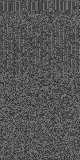

TypeError: ignored

In [ ]:
convertToImage(g4mic_bkt,"Benign/Binary/02eounrel.bin",'Benign/Images/02eounrel.jpeg')